In [ ]:
import pandas as pd
import requests
import time
import calendar
from io import StringIO
from tqdm import tqdm  

def fetch_earthquake_data(start_date, end_date, min_magnitude=2.5, max_retries=3):
    """Fetch earthquake data from USGS for a given date range."""
    base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

    params = {
        "format": "csv",
        "starttime": start_date,
        "endtime": end_date,
        "minmagnitude": min_magnitude,
        "eventtype": "earthquake"  
    }

    for attempt in range(max_retries):
        try:
            response = requests.get(base_url, params=params, timeout=10)
            if response.status_code == 200:
                print(f"✅ Data fetched for {start_date} to {end_date}")
                return pd.read_csv(StringIO(response.text))
            else:
                print(f"❌ Failed (status {response.status_code}) on attempt {attempt+1}")
        except Exception as e:
            print(f"⚡ Exception on attempt {attempt+1}: {e}")

        time.sleep(2)  # Wait a bit before retrying

    print(f"❌ All attempts failed for {start_date} to {end_date}")
    return None

# Initialize list to store fetched data
all_data = []

# Loop from 2000 to 2025 in 2-month intervals
for year in tqdm(range(2000, 2025), desc="Years"):
    for month in range(1, 13, 2):
        start_date = f"{year}-{month:02d}-01"

        # Properly calculate last day of end month
        end_month = month + 1 if month < 12 else 12
        last_day = calendar.monthrange(year, end_month)[1]
        end_date = f"{year}-{end_month:02d}-{last_day}"

        # Fetch data
        df = fetch_earthquake_data(start_date, end_date)

        if df is not None and not df.empty:
            all_data.append(df)

            # Optionally save intermediate results every 20 fetches
            if len(all_data) % 20 == 0:
                temp_df = pd.concat(all_data, ignore_index=True)
                temp_df.drop_duplicates(inplace=True)
                temp_df.to_csv("earthquake_dataset_partial.csv", index=False)
                print(f"💾 Partial save after {len(all_data)} batches.")

        time.sleep(1)  # Sleep to avoid hammering server

# Combine all data
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.drop_duplicates(inplace=True)
    final_df.to_csv("earthquake_dataset_large.csv", index=False)
    print(f"✅ Final dataset saved with {final_df.shape[0]} records!")
else:
    print("❌ No data fetched. Check API status or try later.")


Years:   0%|          | 0/25 [00:00<?, ?it/s]

✅ Data fetched for 2000-01-01 to 2000-02-29
✅ Data fetched for 2000-03-01 to 2000-04-30
✅ Data fetched for 2000-05-01 to 2000-06-30
✅ Data fetched for 2000-07-01 to 2000-08-31
✅ Data fetched for 2000-09-01 to 2000-10-31
✅ Data fetched for 2000-11-01 to 2000-12-31


Years:   4%|▍         | 1/25 [00:19<07:57, 19.89s/it]

✅ Data fetched for 2001-01-01 to 2001-02-28
✅ Data fetched for 2001-03-01 to 2001-04-30
✅ Data fetched for 2001-05-01 to 2001-06-30
✅ Data fetched for 2001-07-01 to 2001-08-31
✅ Data fetched for 2001-09-01 to 2001-10-31
✅ Data fetched for 2001-11-01 to 2001-12-31


Years:   8%|▊         | 2/25 [00:38<07:22, 19.22s/it]

✅ Data fetched for 2002-01-01 to 2002-02-28
✅ Data fetched for 2002-03-01 to 2002-04-30
✅ Data fetched for 2002-05-01 to 2002-06-30
✅ Data fetched for 2002-07-01 to 2002-08-31
✅ Data fetched for 2002-09-01 to 2002-10-31
✅ Data fetched for 2002-11-01 to 2002-12-31


Years:  12%|█▏        | 3/25 [01:00<07:27, 20.32s/it]

✅ Data fetched for 2003-01-01 to 2003-02-28
✅ Data fetched for 2003-03-01 to 2003-04-30
💾 Partial save after 20 batches.
✅ Data fetched for 2003-05-01 to 2003-06-30
✅ Data fetched for 2003-07-01 to 2003-08-31
✅ Data fetched for 2003-09-01 to 2003-10-31
✅ Data fetched for 2003-11-01 to 2003-12-31


Years:  16%|█▌        | 4/25 [01:24<07:35, 21.71s/it]

✅ Data fetched for 2004-01-01 to 2004-02-29
✅ Data fetched for 2004-03-01 to 2004-04-30
✅ Data fetched for 2004-05-01 to 2004-06-30
✅ Data fetched for 2004-07-01 to 2004-08-31
✅ Data fetched for 2004-09-01 to 2004-10-31
✅ Data fetched for 2004-11-01 to 2004-12-31


Years:  20%|██        | 5/25 [01:46<07:16, 21.85s/it]

✅ Data fetched for 2005-01-01 to 2005-02-28
✅ Data fetched for 2005-03-01 to 2005-04-30
✅ Data fetched for 2005-05-01 to 2005-06-30
✅ Data fetched for 2005-07-01 to 2005-08-31
✅ Data fetched for 2005-09-01 to 2005-10-31
✅ Data fetched for 2005-11-01 to 2005-12-31


Years:  24%|██▍       | 6/25 [02:08<06:58, 22.03s/it]

✅ Data fetched for 2006-01-01 to 2006-02-28
✅ Data fetched for 2006-03-01 to 2006-04-30
✅ Data fetched for 2006-05-01 to 2006-06-30
✅ Data fetched for 2006-07-01 to 2006-08-31
💾 Partial save after 40 batches.
✅ Data fetched for 2006-09-01 to 2006-10-31
✅ Data fetched for 2006-11-01 to 2006-12-31


Years:  28%|██▊       | 7/25 [02:31<06:40, 22.28s/it]

✅ Data fetched for 2007-01-01 to 2007-02-28
✅ Data fetched for 2007-03-01 to 2007-04-30
✅ Data fetched for 2007-05-01 to 2007-06-30
✅ Data fetched for 2007-07-01 to 2007-08-31
✅ Data fetched for 2007-09-01 to 2007-10-31
✅ Data fetched for 2007-11-01 to 2007-12-31


Years:  32%|███▏      | 8/25 [02:52<06:14, 22.01s/it]

✅ Data fetched for 2008-01-01 to 2008-02-29
✅ Data fetched for 2008-03-01 to 2008-04-30
✅ Data fetched for 2008-05-01 to 2008-06-30
✅ Data fetched for 2008-07-01 to 2008-08-31
✅ Data fetched for 2008-09-01 to 2008-10-31
✅ Data fetched for 2008-11-01 to 2008-12-31


Years:  36%|███▌      | 9/25 [03:15<05:54, 22.18s/it]

✅ Data fetched for 2009-01-01 to 2009-02-28
✅ Data fetched for 2009-03-01 to 2009-04-30
✅ Data fetched for 2009-05-01 to 2009-06-30
✅ Data fetched for 2009-07-01 to 2009-08-31
✅ Data fetched for 2009-09-01 to 2009-10-31
✅ Data fetched for 2009-11-01 to 2009-12-31
💾 Partial save after 60 batches.


Years:  40%|████      | 10/25 [03:38<05:35, 22.35s/it]

✅ Data fetched for 2010-01-01 to 2010-02-28
✅ Data fetched for 2010-03-01 to 2010-04-30
✅ Data fetched for 2010-05-01 to 2010-06-30
✅ Data fetched for 2010-07-01 to 2010-08-31
✅ Data fetched for 2010-09-01 to 2010-10-31
✅ Data fetched for 2010-11-01 to 2010-12-31


Years:  44%|████▍     | 11/25 [03:58<05:06, 21.90s/it]

✅ Data fetched for 2011-01-01 to 2011-02-28
✅ Data fetched for 2011-03-01 to 2011-04-30
✅ Data fetched for 2011-05-01 to 2011-06-30
✅ Data fetched for 2011-07-01 to 2011-08-31
✅ Data fetched for 2011-09-01 to 2011-10-31
✅ Data fetched for 2011-11-01 to 2011-12-31


Years:  48%|████▊     | 12/25 [04:17<04:29, 20.75s/it]

✅ Data fetched for 2012-01-01 to 2012-02-29
✅ Data fetched for 2012-03-01 to 2012-04-30
✅ Data fetched for 2012-05-01 to 2012-06-30
✅ Data fetched for 2012-07-01 to 2012-08-31
✅ Data fetched for 2012-09-01 to 2012-10-31
✅ Data fetched for 2012-11-01 to 2012-12-31


Years:  52%|█████▏    | 13/25 [04:34<03:55, 19.62s/it]

✅ Data fetched for 2013-01-01 to 2013-02-28
✅ Data fetched for 2013-03-01 to 2013-04-30
💾 Partial save after 80 batches.
✅ Data fetched for 2013-05-01 to 2013-06-30
✅ Data fetched for 2013-07-01 to 2013-08-31
✅ Data fetched for 2013-09-01 to 2013-10-31
✅ Data fetched for 2013-11-01 to 2013-12-31


Years:  56%|█████▌    | 14/25 [04:55<03:41, 20.11s/it]

✅ Data fetched for 2014-01-01 to 2014-02-28
✅ Data fetched for 2014-03-01 to 2014-04-30
✅ Data fetched for 2014-05-01 to 2014-06-30
✅ Data fetched for 2014-07-01 to 2014-08-31
✅ Data fetched for 2014-09-01 to 2014-10-31
✅ Data fetched for 2014-11-01 to 2014-12-31


Years:  60%|██████    | 15/25 [05:14<03:19, 19.91s/it]

✅ Data fetched for 2015-01-01 to 2015-02-28
✅ Data fetched for 2015-03-01 to 2015-04-30
✅ Data fetched for 2015-05-01 to 2015-06-30
✅ Data fetched for 2015-07-01 to 2015-08-31
✅ Data fetched for 2015-09-01 to 2015-10-31
✅ Data fetched for 2015-11-01 to 2015-12-31


Years:  64%|██████▍   | 16/25 [05:33<02:55, 19.50s/it]

✅ Data fetched for 2016-01-01 to 2016-02-29
✅ Data fetched for 2016-03-01 to 2016-04-30
✅ Data fetched for 2016-05-01 to 2016-06-30
✅ Data fetched for 2016-07-01 to 2016-08-31
💾 Partial save after 100 batches.
✅ Data fetched for 2016-09-01 to 2016-10-31
✅ Data fetched for 2016-11-01 to 2016-12-31


Years:  68%|██████▊   | 17/25 [05:57<02:47, 20.89s/it]

✅ Data fetched for 2017-01-01 to 2017-02-28
✅ Data fetched for 2017-03-01 to 2017-04-30
✅ Data fetched for 2017-05-01 to 2017-06-30
✅ Data fetched for 2017-07-01 to 2017-08-31
✅ Data fetched for 2017-09-01 to 2017-10-31
✅ Data fetched for 2017-11-01 to 2017-12-31


Years:  72%|███████▏  | 18/25 [06:16<02:22, 20.30s/it]

✅ Data fetched for 2018-01-01 to 2018-02-28
✅ Data fetched for 2018-03-01 to 2018-04-30
✅ Data fetched for 2018-05-01 to 2018-06-30
✅ Data fetched for 2018-07-01 to 2018-08-31
✅ Data fetched for 2018-09-01 to 2018-10-31
✅ Data fetched for 2018-11-01 to 2018-12-31


Years:  76%|███████▌  | 19/25 [06:38<02:04, 20.80s/it]

✅ Data fetched for 2019-01-01 to 2019-02-28
✅ Data fetched for 2019-03-01 to 2019-04-30
✅ Data fetched for 2019-05-01 to 2019-06-30
✅ Data fetched for 2019-07-01 to 2019-08-31
✅ Data fetched for 2019-09-01 to 2019-10-31
✅ Data fetched for 2019-11-01 to 2019-12-31
💾 Partial save after 120 batches.


Years:  80%|████████  | 20/25 [07:03<01:50, 22.14s/it]

✅ Data fetched for 2020-01-01 to 2020-02-29
✅ Data fetched for 2020-03-01 to 2020-04-30
✅ Data fetched for 2020-05-01 to 2020-06-30
✅ Data fetched for 2020-07-01 to 2020-08-31
✅ Data fetched for 2020-09-01 to 2020-10-31
✅ Data fetched for 2020-11-01 to 2020-12-31


Years:  84%|████████▍ | 21/25 [07:23<01:25, 21.44s/it]

✅ Data fetched for 2021-01-01 to 2021-02-28
✅ Data fetched for 2021-03-01 to 2021-04-30
✅ Data fetched for 2021-05-01 to 2021-06-30
✅ Data fetched for 2021-07-01 to 2021-08-31
✅ Data fetched for 2021-09-01 to 2021-10-31
✅ Data fetched for 2021-11-01 to 2021-12-31


Years:  88%|████████▊ | 22/25 [07:43<01:02, 20.93s/it]

✅ Data fetched for 2022-01-01 to 2022-02-28
✅ Data fetched for 2022-03-01 to 2022-04-30
✅ Data fetched for 2022-05-01 to 2022-06-30
✅ Data fetched for 2022-07-01 to 2022-08-31
✅ Data fetched for 2022-09-01 to 2022-10-31
✅ Data fetched for 2022-11-01 to 2022-12-31


Years:  92%|█████████▏| 23/25 [08:01<00:40, 20.26s/it]

✅ Data fetched for 2023-01-01 to 2023-02-28
✅ Data fetched for 2023-03-01 to 2023-04-30
💾 Partial save after 140 batches.
✅ Data fetched for 2023-05-01 to 2023-06-30
✅ Data fetched for 2023-07-01 to 2023-08-31
✅ Data fetched for 2023-09-01 to 2023-10-31
✅ Data fetched for 2023-11-01 to 2023-12-31


Years:  96%|█████████▌| 24/25 [08:27<00:21, 21.93s/it]

✅ Data fetched for 2024-01-01 to 2024-02-29
✅ Data fetched for 2024-03-01 to 2024-04-30
✅ Data fetched for 2024-05-01 to 2024-06-30
✅ Data fetched for 2024-07-01 to 2024-08-31
✅ Data fetched for 2024-09-01 to 2024-10-31
✅ Data fetched for 2024-11-01 to 2024-12-31


Years: 100%|██████████| 25/25 [08:45<00:00, 21.01s/it]


✅ Final dataset saved with 640954 records!


✅ Data Loaded

🔎 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640954 entries, 0 to 640953
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             640954 non-null  object 
 1   latitude         640954 non-null  float64
 2   longitude        640954 non-null  float64
 3   depth            640954 non-null  float64
 4   mag              640954 non-null  float64
 5   magType          640953 non-null  object 
 6   nst              413465 non-null  float64
 7   gap              527550 non-null  float64
 8   dmin             285762 non-null  float64
 9   rms              535290 non-null  float64
 10  net              640954 non-null  object 
 11  id               640954 non-null  object 
 12  updated          640954 non-null  object 
 13  place            640954 non-null  object 
 14  type             640954 non-null  object 
 15  horizontalError  291134 non-null  float64
 16  de

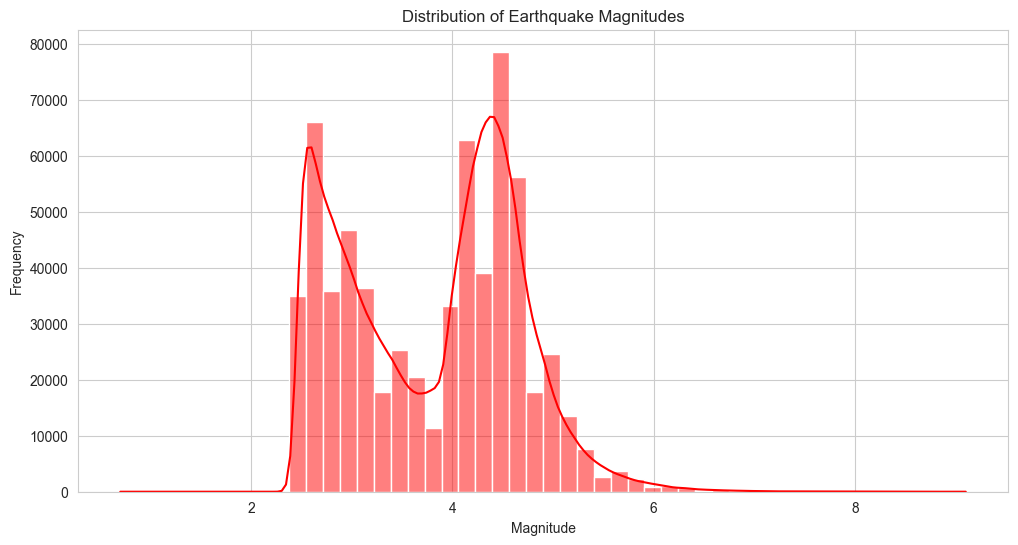

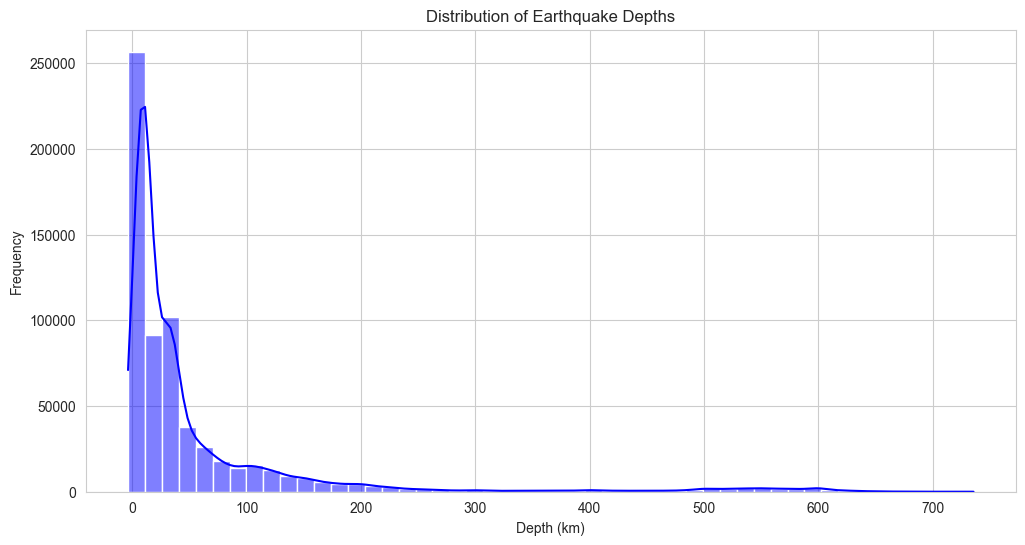

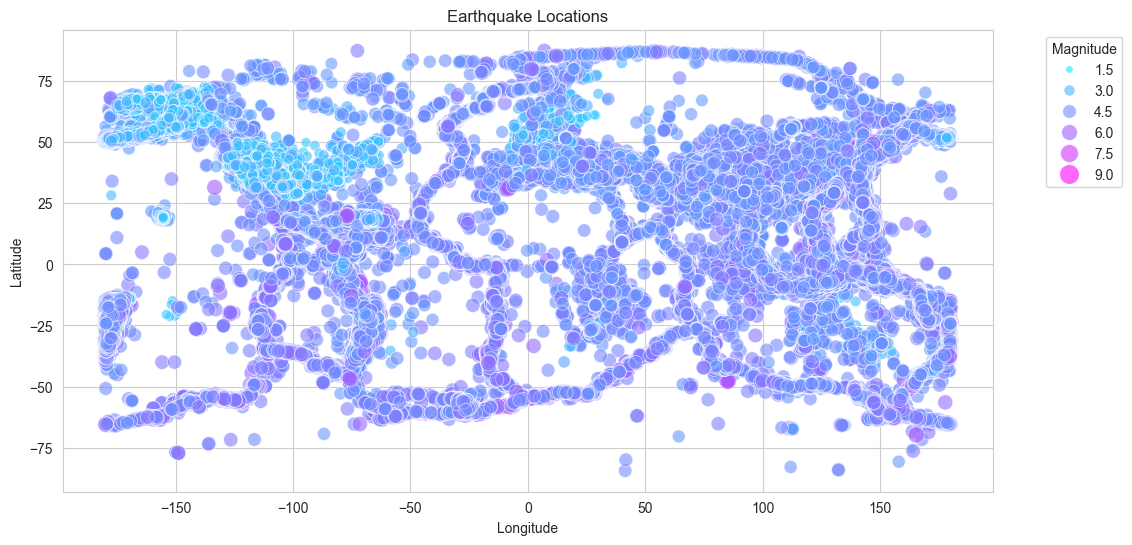

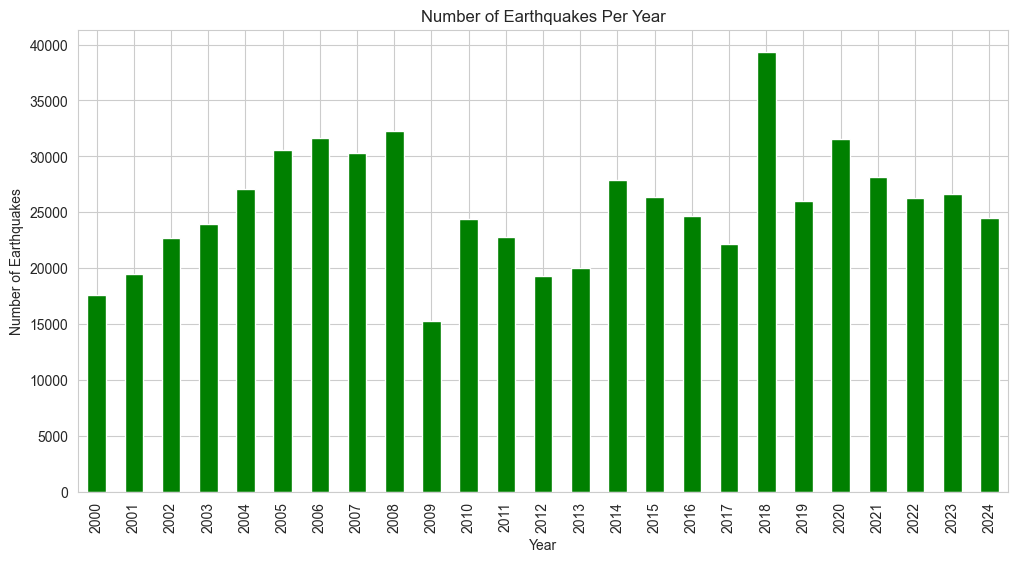


💥 Number of Strong Earthquakes (Mag >= 6.0): 3674


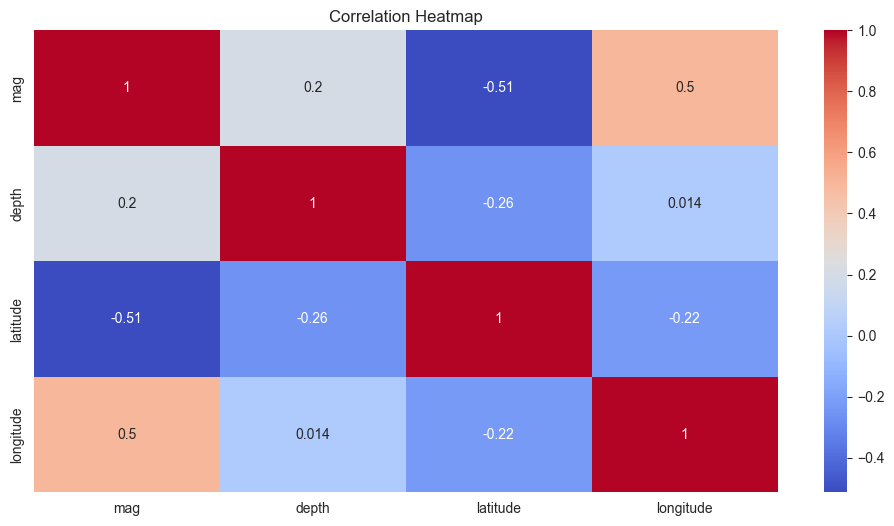

✅ Cleaned dataset saved!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Load Data
df = pd.read_csv("earthquake_dataset_large.csv")
print("✅ Data Loaded")

# 2. Basic Info
print("\n🔎 Basic Information:")
print(df.info())
print("\n📈 Shape of dataset:", df.shape)

# 3. Missing Values
print("\n🧹 Missing Values:")
print(df.isnull().sum())

# 4. Quick Statistics
print("\n📊 Statistics Summary:")
print(df.describe())

# 5. Magnitude Distribution
plt.figure()
sns.histplot(df['mag'], bins=50, kde=True, color='red')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 6. Depth Distribution
plt.figure()
sns.histplot(df['depth'], bins=50, kde=True, color='blue')
plt.title("Distribution of Earthquake Depths")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 7. Location Scatter (Latitude vs Longitude)
plt.figure()
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag', data=df, palette="cool", sizes=(10, 200), alpha=0.6)
plt.title("Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Magnitude", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 8. Time Feature Engineering
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# 9. Earthquakes Per Year
plt.figure()
df['year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Number of Earthquakes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.show()

# 10. Strong Earthquakes (Magnitude > 6.0)
strong_quakes = df[df['mag'] >= 6.0]
print("\n💥 Number of Strong Earthquakes (Mag >= 6.0):", strong_quakes.shape[0])

# 11. Correlation Heatmap
plt.figure()
sns.heatmap(df[['mag', 'depth', 'latitude', 'longitude']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 12. Save a cleaned version
df_cleaned = df.dropna(subset=["mag", "depth", "latitude", "longitude", "time"])
df_cleaned.to_csv("earthquake_dataset_cleaned.csv", index=False)
print("✅ Cleaned dataset saved!")

